In [210]:
import warnings
warnings.filterwarnings("ignore")

In [211]:
# getting all the column names
start_capture = False
captured_lines = []

with open("data/task1/dermatology.names", "r") as f:
    for line in f:
        if "Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)" in line:
            start_capture = True
        elif "8. Missing Attribute Values: 8 (in Age attribute). Distinguished with '?'." in line:
            break
        elif "Histopathological Attributes: (take values 0, 1, 2, 3)" in line:
            continue
        elif "34: Age (linear)" in line:
            continue
        elif start_capture:
            text = line.strip()
            temp = text.split(":")
            if len(temp) > 1 :
                captured_lines.append(temp[1][1:len(temp[1])])

#last column is the classification column which is not mentioned in the details
column_names = "\n".join(captured_lines)
column_names += "\nAge\nclass"
print(column_names)


erythema
scaling
definite borders
itching
koebner phenomenon
polygonal papules
follicular papules
oral mucosal involvement
knee and elbow involvement
scalp involvement
family history, (0 or 1)
melanin incontinence
eosinophils in the infiltrate
PNL infiltrate
fibrosis of the papillary dermis
exocytosis
acanthosis
hyperkeratosis
parakeratosis
clubbing of the rete ridges
elongation of the rete ridges
thinning of the suprapapillary epidermis
spongiform pustule
munro microabcess
focal hypergranulosis
disappearance of the granular layer
vacuolisation and damage of basal layer
spongiosis
saw-tooth appearance of retes
follicular horn plug
perifollicular parakeratosis
inflammatory monoluclear inflitrate
band-like infiltrate
Age
class


In [212]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [213]:
column_names = column_names.split("\n")

In [214]:
len(column_names)

35

In [215]:
df = pd.read_csv("data/task1/dermatology.data", names = column_names)
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [216]:
df.shape

(366, 35)

In [217]:
# replace ? with na and then na with median age
df["Age"].replace("?", np.nan, inplace=True)
median_age = df["Age"].median()
df["Age"].fillna(median_age, inplace=True)

In [218]:
X = df.drop(columns=["class"])
y = df["class"]
y = y-1 # cause i have 1,2,3,4,5,6 but i need 0,1,2,3,4,5

In [219]:
num_classes = len(y.unique())
num_classes

6

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [221]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [222]:
import tensorflow as tf
from tensorflow import keras

lr = 0.001

model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [223]:
y_test.shape

(74,)

In [224]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [225]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                2240      
                                                                 
 dense_51 (Dense)            (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 6)                 198       
                                                                 
Total params: 4518 (17.65 KB)
Trainable params: 4518 (17.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [226]:
from my_utils import get_hyperparameters
get_hyperparameters(model)

Learning Rate: 0.0010
Number of Hidden Layers: 1
Number of Neurons in Each Hidden Layer: [32]
Activation Functions: ['relu', 'relu', 'softmax']
Loss Function: sparse_categorical_crossentropy
Optimizer: Adam
Metrics for Evaluation: ['loss', 'accuracy']


In [233]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

3/3 - 0s - loss: 0.0465 - accuracy: 0.9865 - 16ms/epoch - 5ms/step
Test accuracy: 98.65%


In [231]:
training_accuracy = history.history["accuracy"][-1]
print(f"Training Accuracy: {training_accuracy:.4f}")

Training Accuracy: 1.0000


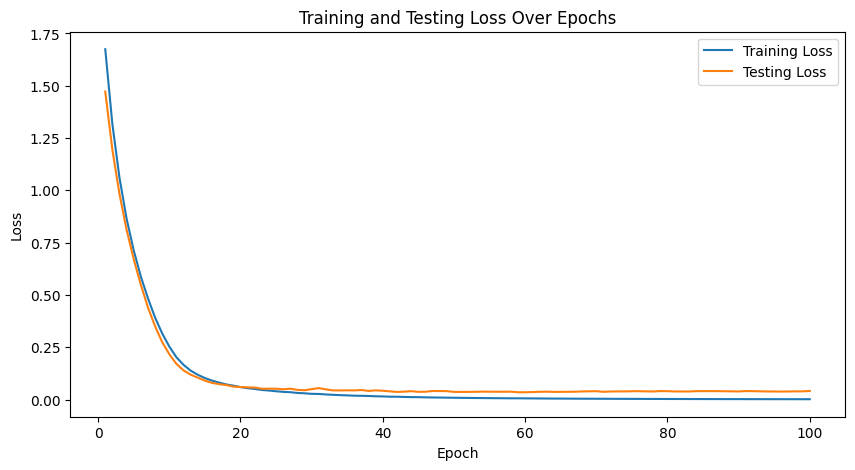

In [232]:
import matplotlib.pyplot as plt

training_loss = history.history["loss"]
testing_loss = history.history["val_loss"]

# epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label="Training Loss")
plt.plot(epochs, testing_loss, label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Testing Loss Over Epochs")
plt.legend()
plt.show()

